In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import matplotlib.mlab as mlab


In [3]:
wine_data = pd.read_csv('../data/rawdata/wine-reviews/winemag-data-130k-v2.csv')

In [4]:
wine_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
wine_data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [6]:
wine_data.count()

Unnamed: 0               129971
country                  129908
description              129971
designation               92506
points                   129971
price                    120975
province                 129908
region_1                 108724
region_2                  50511
taster_name              103727
taster_twitter_handle     98758
title                    129971
variety                  129970
winery                   129971
dtype: int64

In [7]:
wine_data.nunique()

Unnamed: 0               129971
country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [8]:
wine_data['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [9]:
country_province = wine_data.groupby(['taster_name']).mean()
country_province.reset_index
country_province = country_province.reset_index()
country_province.head()

,taster_name,Unnamed: 0,points,price
0,Alexander Peartree,63922.395181,85.855422,29.053269
1,Anna Lee C. Iijima,66204.838732,88.415629,29.790112
2,Anne Krebiehl MW,66607.729715,90.562551,31.230135
3,Carrie Dykes,76156.568345,86.395683,30.753623
4,Christina Pickard,55558.166667,87.833333,29.333333


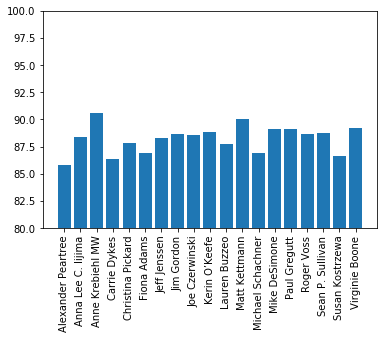

In [10]:
plt.bar(country_province['taster_name'],country_province['points'])
plt.ylim(80,100)
plt.xticks(rotation=90)

plt.show()

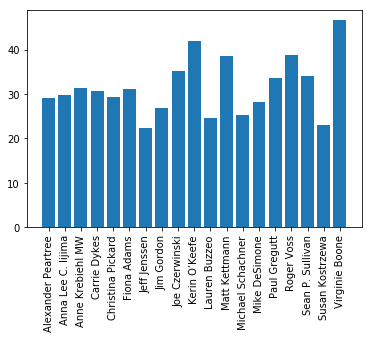

In [11]:
plt.bar(country_province['taster_name'],country_province['price'])
#plt.ylim(80,100)
plt.xticks(rotation=90)

plt.show()

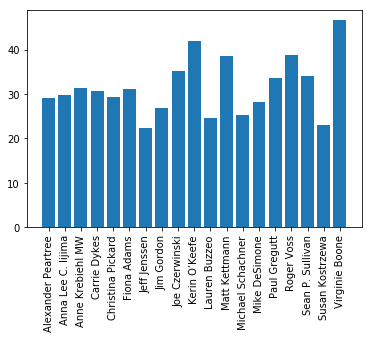

In [12]:
plt.bar(country_province['taster_name'],country_province['price'])
#plt.ylim(80,100)
plt.xticks(rotation=90)

plt.show()

In [13]:
price = country_province.price
points = country_province.points
taster = country_province.taster_name

<BarContainer object of 19 artists>

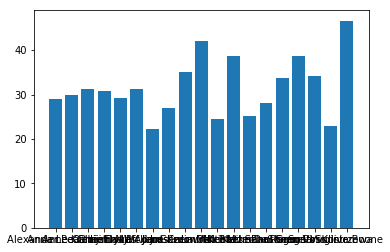

In [14]:
plt.bar(taster,price)

In [15]:
country_df = wine_data.groupby(['country']).mean()
country_df = country_df.reset_index()
country_df.head()

,country,Unnamed: 0,points,price
0,Argentina,65075.723158,86.710263,24.510117
1,Armenia,37158.000000,87.500000,14.500000
2,Australia,65037.539287,88.580507,35.437663
3,Austria,65614.296861,90.101345,30.762772
4,Bosnia and Herzegovina,56613.000000,86.500000,12.500000


In [16]:
country_price = country_df.price
country_points = country_df.points
country = country_df.country

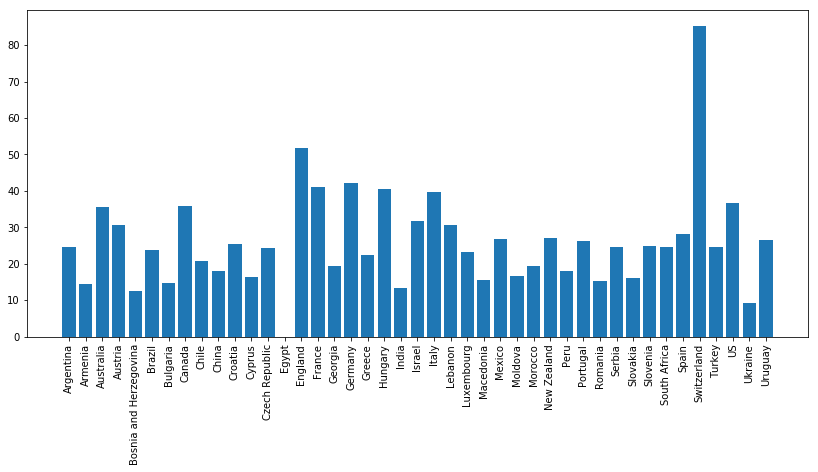

In [17]:
plt.figure(figsize=(14,6))
plt.bar(country,country_price)
plt.xticks(rotation=90)

plt.show()

In [18]:
country_count = wine_data.groupby('country').count()
country_count = country_count.reset_index()
country_count = country_count.sort_values('Unnamed: 0')
country = country_count.country
#country_count = country_count.reset_index()
#country_province.head()
country_count.head()

,country,Unnamed: 0,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
9,China,1,1,1,1,1,1,0,0,1,1,1,1,1
34,Slovakia,1,1,0,1,1,1,0,0,1,0,1,1,1
13,Egypt,1,1,1,1,0,1,0,0,1,1,1,1,1
1,Armenia,2,2,2,2,2,2,0,0,2,2,2,2,2
4,Bosnia and Herzegovina,2,2,1,2,2,2,0,0,2,1,2,2,2


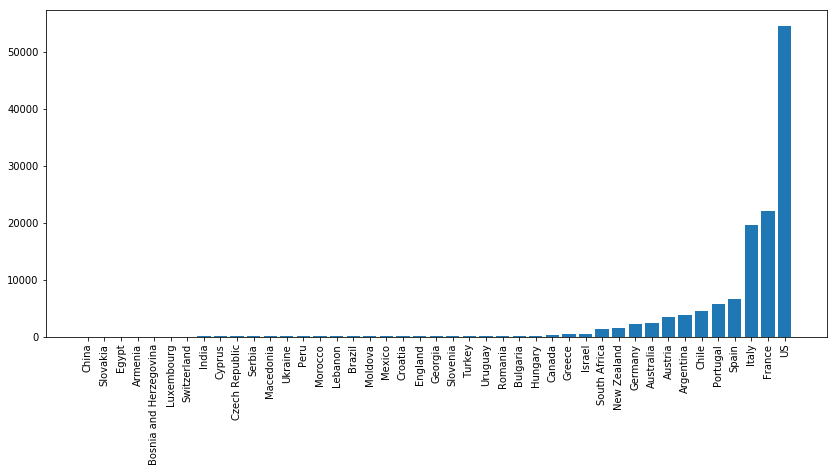

In [19]:
country = country_count.country
n_country = country_count['Unnamed: 0']
plt.figure(figsize=(14,6))
plt.bar(country,n_country)
plt.xticks(rotation=90)
#plt.yscale('log')
plt.show()

In [20]:
clean_data = wine_data.dropna(subset=['country', 'price', 'points'])
clean_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [21]:
#clean_data.taster_name.value_counts()

In [22]:
#clean_data.country.value_counts()

In [23]:
ccountry = clean_data.country
cprice = clean_data.price
cpoints = clean_data.points
cprovince = clean_data.province
clean_data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

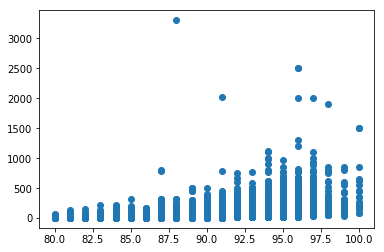

In [24]:
plt.scatter(cpoints,cprice)
plt.show()

In [25]:
median_price = clean_data.groupby('points').median()
median_price = median_price.reset_index()
#median_price.head()

avg_price = clean_data.groupby('points').mean()
#avg_price.head()


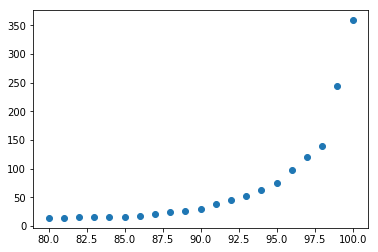

In [26]:
plt.scatter(median_price['points'],median_price['price'])
plt.show()

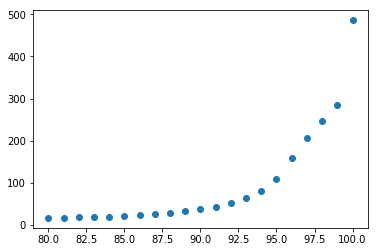

In [27]:
plt.scatter(median_price['points'],avg_price['price'])
plt.show()

In [28]:
avg_price = clean_data.groupby('points').mean()
avg_price = avg_price.reset_index()
avg_price.head()

,points,Unnamed: 0,price
0,80,74968.572152,16.372152
1,81,70810.191176,17.182353
2,82,67098.678330,18.870767
3,83,67893.402633,18.237353
4,84,63399.280630,19.314581


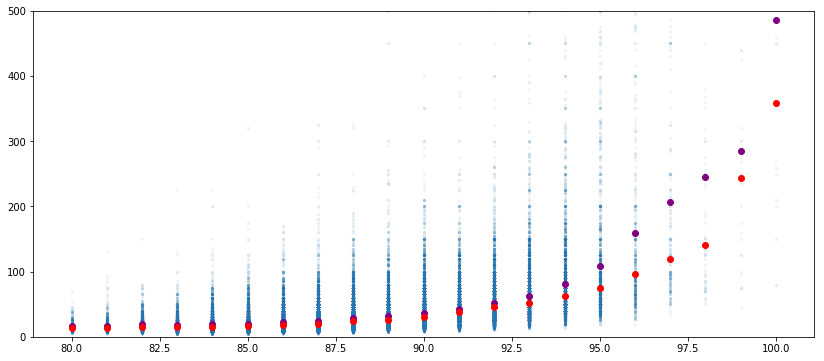

In [29]:
plt.figure(figsize=(14,6))
plt.scatter(cpoints,cprice,alpha=0.05,s=5)
plt.scatter(avg_price['points'],avg_price['price'],c='purple')
plt.scatter(median_price['points'],median_price['price'],c='r')
#plt.scatter(cpoints,cprice,alpha=0.1)
plt.ylim(0,500)
plt.show()

In [30]:
clean_data_med = clean_data.groupby('points').median()
clean_data_med = clean_data_med.reset_index()
clean_data_err = clean_data.groupby('points').sem()
clean_data_err = clean_data_err.reset_index()

#clean_data_med.head()
#us_med = us.groupby('points').median()
#us_med = us_med.reset_index()
#us_err = us.groupby('points').sem()
#us_err = us_err.reset_index()

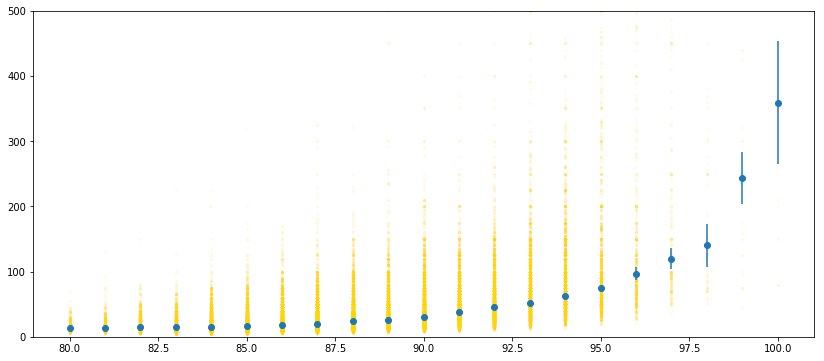

In [31]:
plt.figure(figsize=(14,6))
#plt.scatter(us_med['points'],us_med['price'],alpha=0.75)
plt.errorbar(clean_data_med.points, clean_data_med.price, clean_data_err.price, fmt="o")
plt.scatter(cpoints,cprice,alpha=0.05,s=5, c='gold')
#plt.errorbar(france_med.points, france_med.price,france_err.price, fmt="s")
#plt.errorbar(italy_med.points, italy_med.price,italy_err.price, fmt="d")
#plt.grid()
#plt.plot(b['points'],b['price'])
plt.ylim(0,500)
plt.show()

In [125]:
us = clean_data.loc[clean_data['country']=='US',['points','price']]
france = clean_data.loc[clean_data['country']=='France',['points','price']]
italy = clean_data.loc[clean_data['country']=='Italy',['points','price']]
spain = clean_data.loc[clean_data['country']=='Spain',['points','price']]
portugal = clean_data.loc[clean_data['country']=='Portugal',['points','price']]
argentina = clean_data.loc[clean_data['country']=='Argentina',['points','price']]
austria = clean_data.loc[clean_data['country']=='Austria',['points','price']]
australia = clean_data.loc[clean_data['country']=='Australia',['points','price']]
germany = clean_data.loc[clean_data['country']=='Germany',['points','price']]
newzealand = clean_data.loc[clean_data['country']=='New Zealand',['points','price']]
southafrica = clean_data.loc[clean_data['country']=='South Africa',['points','price']]
israel = clean_data.loc[clean_data['country']=='Israel',['points','price']]
greece = clean_data.loc[clean_data['country']=='Greece',['points','price']]
canada = clean_data.loc[clean_data['country']=='Canada',['points','price']]

In [127]:
us_med = us.groupby('points').median()
us_med = us_med.reset_index()
us_err = us.groupby('points').sem()
us_err = us_err.reset_index()

france_med = france.groupby('points').median()
france_med = france_med.reset_index()
france_err = france.groupby('points').sem()
france_err = france_err.reset_index()

italy_med = italy.groupby('points').median()
italy_med = italy_med.reset_index()
italy_err = italy.groupby('points').sem()
italy_err = italy_err.reset_index()

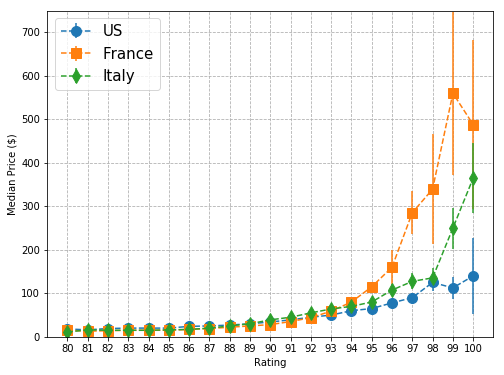

In [164]:
plt.figure(figsize=(8,6))
#plt.scatter(us_med['points'],us_med['price'],alpha=0.75)
plt.errorbar(us_med.points, us_med.price, us_err.price, fmt="--o", label='US', markersize=10)
plt.errorbar(france_med.points, france_med.price, france_err.price, fmt="s--", label='France', markersize=10)
plt.errorbar(italy_med.points, italy_med.price,italy_err.price, fmt="d--", label='Italy', markersize=10)
plt.grid(linestyle='--')
plt.ylim(0,750)
plt.xticks(range(80,101))
#plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Median Price ($)')
plt.legend(loc='upper left',prop={'size':15})

plt.show()

In [33]:
country_province[country_province['taster_name']=='Roger Voss']['points']

15    88.708003
Name: points, dtype: float64

In [34]:
clean_data.taster_name.value_counts()

Roger Voss            20172
Michael Schachner     14944
Kerin O’Keefe          9874
Virginie Boone         9507
Paul Gregutt           9497
Matt Kettmann          6237
Joe Czerwinski         5010
Sean P. Sullivan       4925
Anna Lee C. Iijima     4369
Jim Gordon             4171
Anne Krebiehl MW       3389
Lauren Buzzeo          1712
Susan Kostrzewa        1068
Mike DeSimone           492
Jeff Jenssen            469
Alexander Peartree      413
Carrie Dykes            138
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

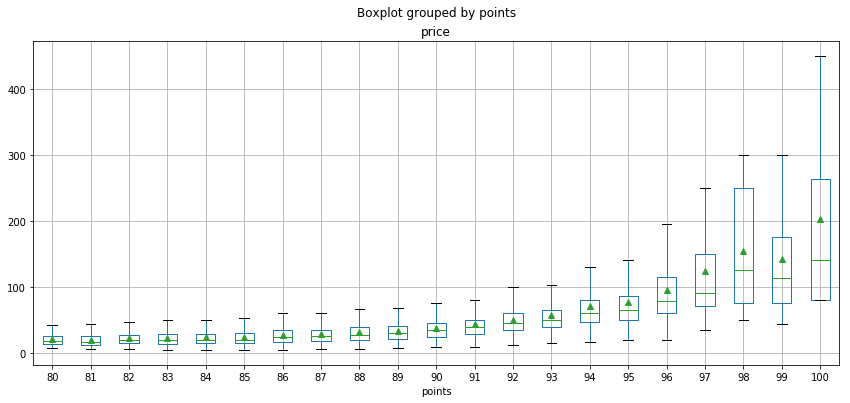

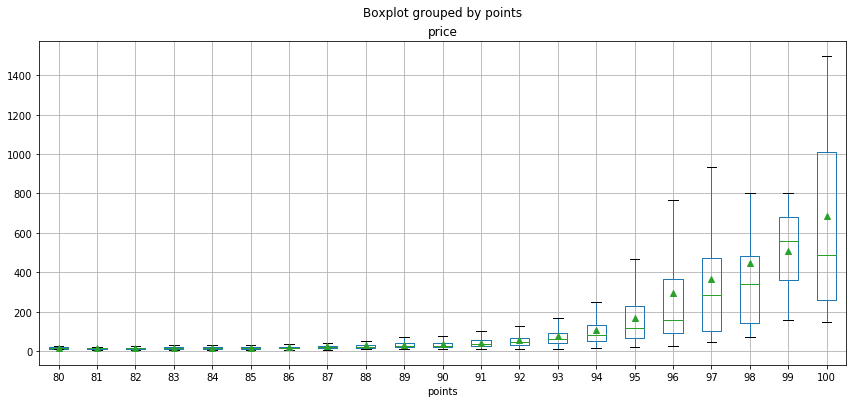

In [174]:
us.boxplot("price", by="points", figsize=(14, 6), showmeans=True, showfliers=False)
france.boxplot("price", by="points", figsize=(14, 6), showmeans=True, showfliers=False)
#plt.xticks(rotation=90)
plt.show()

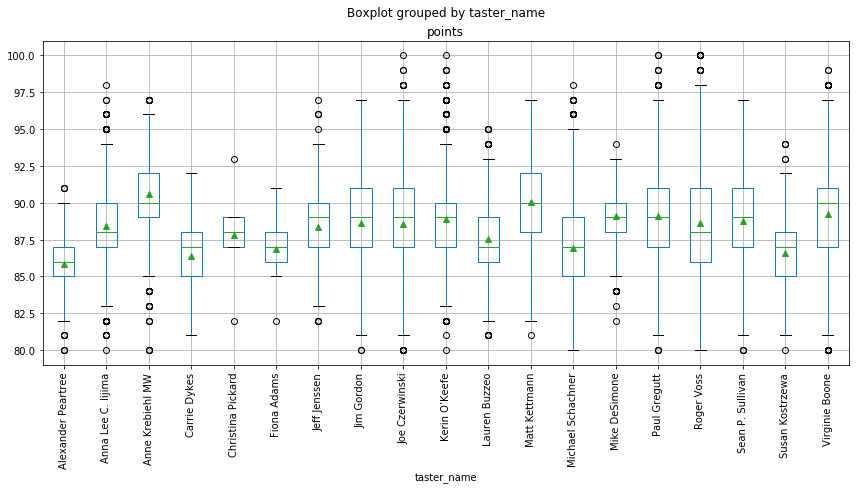

In [35]:
#cleaclean_data.sort(ascending=False)
clean_data.boxplot("points", by="taster_name", figsize=(14, 6), showmeans=True)
plt.xticks(rotation=90)
plt.show()

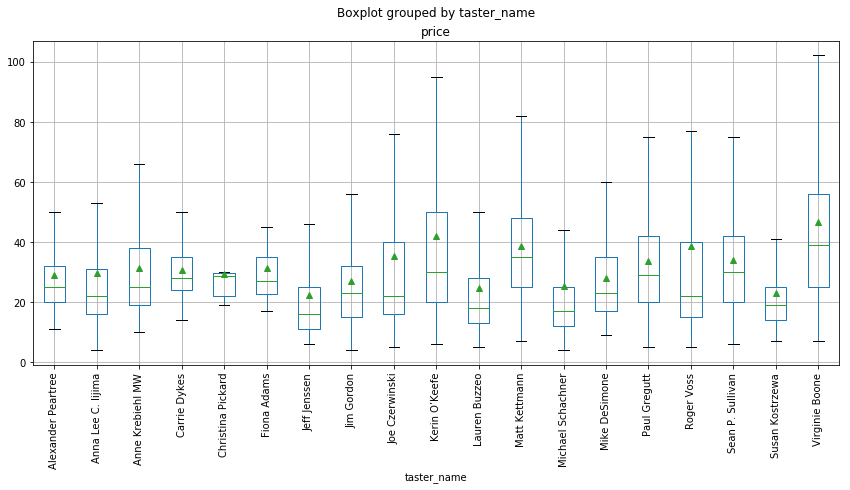

In [36]:
clean_data.boxplot("price", by="taster_name", figsize=(14, 6), showmeans=True, showfliers=False)
plt.xticks(rotation=90)
plt.show()

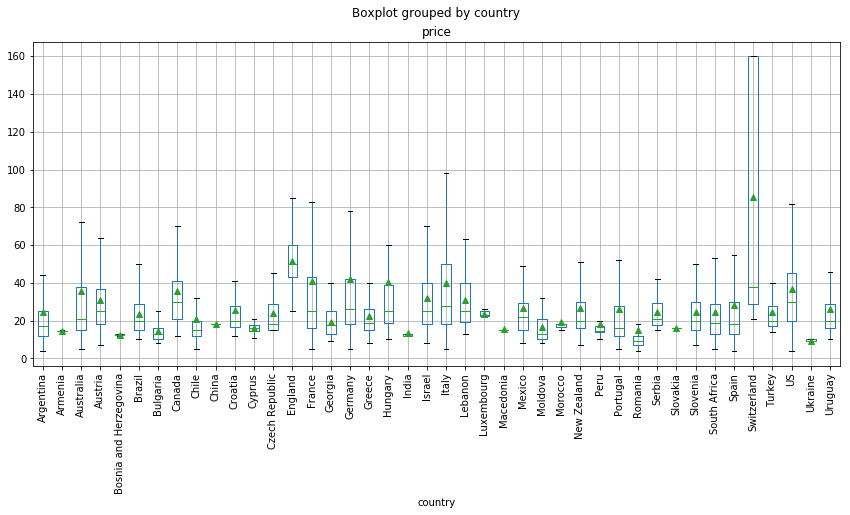

In [37]:
clean_data.boxplot("price", by="country", figsize=(14, 6), showmeans=True, showfliers=False)
plt.xticks(rotation=90)
plt.show()

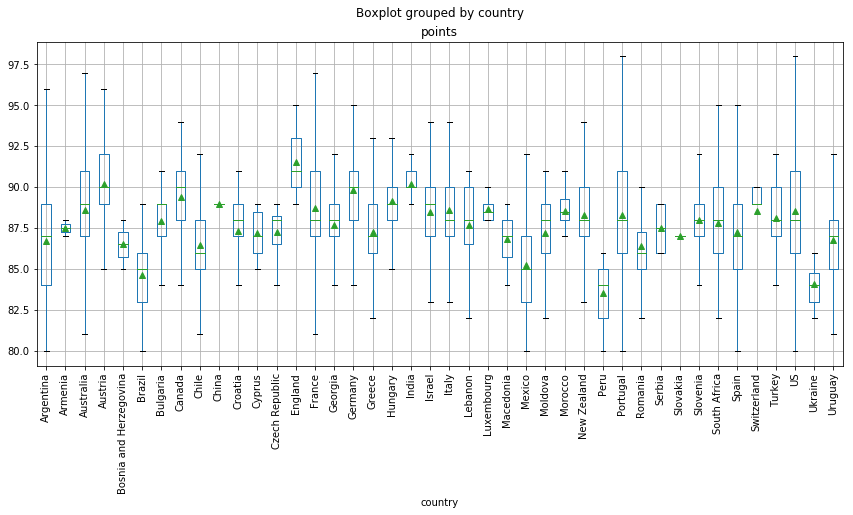

In [38]:
clean_data.boxplot("points", by="country", figsize=(14, 6), showmeans=True, showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [39]:
clean_data.taster_name.value_counts()

Roger Voss            20172
Michael Schachner     14944
Kerin O’Keefe          9874
Virginie Boone         9507
Paul Gregutt           9497
Matt Kettmann          6237
Joe Czerwinski         5010
Sean P. Sullivan       4925
Anna Lee C. Iijima     4369
Jim Gordon             4171
Anne Krebiehl MW       3389
Lauren Buzzeo          1712
Susan Kostrzewa        1068
Mike DeSimone           492
Jeff Jenssen            469
Alexander Peartree      413
Carrie Dykes            138
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [40]:
len(cpoints)

120916

In [41]:
pts_counts = clean_data.groupby('points')['Unnamed: 0'].count()
pts_counts

points
80       395
81       680
82      1772
83      2886
84      6097
85      8901
86     11740
87     15761
88     16005
89     11306
90     14354
91     10559
92      8865
93      5935
94      3449
95      1406
96       482
97       207
98        69
99        28
100       19
Name: Unnamed: 0, dtype: int64

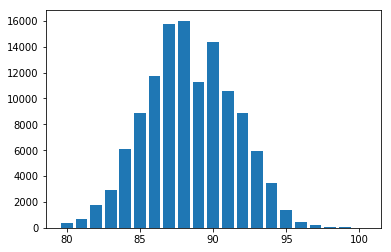

In [42]:
plt.bar(median_price['points'],pts_counts)
plt.show()

C:\Users\alaq3\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


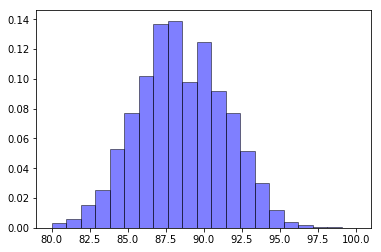

In [43]:
x = clean_data['points']
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, normed=1, edgecolor='k',histtype='bar',align='mid')
#n, bins, patches = plt.hist(x, num_bins,align='mid',line=True)

#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)
plt.show()

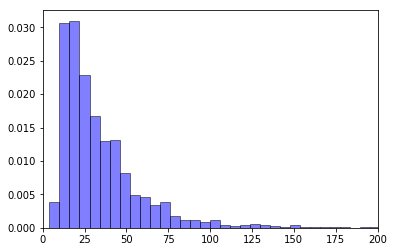

In [44]:
x = clean_data['price']
num_bins = 550
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, normed=1, edgecolor='k', histtype='bar',align='mid')
#plt.plot(bins, y, 'r--')
plt.xlim(0,200)
plt.show()

In [45]:
ccountry[:10]
#plt.scatter(ccountry[:10],cprovince[:10])

1     Portugal
2           US
3           US
4           US
5        Spain
6        Italy
7       France
8      Germany
9       France
10          US
Name: country, dtype: object

In [46]:
wine_type = clean_data.groupby('variety').count()
wine_type.reset_index()
wine_type = wine_type.sort_values('Unnamed: 0',ascending=False)
wine_type.head(100)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,winery
variety,,,,,,,,,,,,,
Pinot Noir,12785,12785,12785,9543,12785,12785,12785,11693,9008,9833,9622,12785,12785
Chardonnay,11077,11077,11077,7365,11077,11077,11077,10070,6377,8292,7935,11077,11077
Cabernet Sauvignon,9384,9384,9384,5736,9384,9384,9384,8284,7067,6198,6090,9384,9384
Red Blend,8466,8466,8466,7065,8466,8466,8466,7537,2686,6842,6737,8466,8466
Bordeaux-style Red Blend,5340,5340,5340,2911,5340,5340,5340,5123,1709,4816,4700,5340,5340
Riesling,4971,4971,4971,4205,4971,4971,4971,2593,1598,4722,2583,4971,4971
Sauvignon Blanc,4780,4780,4780,2731,4780,4780,4780,3177,1930,3838,3755,4780,4780
Syrah,4086,4086,4086,3022,4086,4086,4086,3617,3122,3103,3075,4086,4086
Rosé,3261,3261,3261,2301,3261,3261,3261,2839,819,3032,2868,3261,3261


In [47]:
clean_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [48]:
country_group = clean_data.groupby(['country','points'])['price'].median()

In [49]:
a=pd.DataFrame(country_group)

In [50]:
a = a.reset_index()

In [51]:
a.head()

,country,points,price
0,Argentina,80,13.0
1,Argentina,81,12.0
2,Argentina,82,13.0
3,Argentina,83,13.0
4,Argentina,84,13.0


In [52]:
len(a)

461

In [53]:
a.country.value_counts().head(10)

Australia    21
France       21
Italy        21
Portugal     21
US           21
Spain        19
Germany      18
Argentina    18
Austria      16
Hungary      16
Name: country, dtype: int64

In [54]:
clean_data.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [55]:

us_med = us.groupby('points').median()
us_med = us_med.reset_index()
us_err = us.groupby('points').sem()
us_err = us_err.reset_index()

france_med = france.groupby('points').median()
france_med = france_med.reset_index()
france_err = france.groupby('points').sem()
france_err = france_err.reset_index()

italy_med = italy.groupby('points').median()
italy_med = italy_med.reset_index()
italy_err = italy.groupby('points').sem()
italy_err = italy_err.reset_index()


#us_err.head()
#us_err.head()

NameError: name 'us' is not defined

In [56]:
plt.figure(figsize=(14,6))
#plt.scatter(us_med['points'],us_med['price'],alpha=0.75)
plt.errorbar(us_med.points, us_med.price, us_err.price, fmt="o", label='US')
plt.errorbar(france_med.points, france_med.price, france_err.price, fmt="s", label='France')
plt.errorbar(italy_med.points, italy_med.price,italy_err.price, fmt="d", label='Italy')
plt.grid()
#plt.ylim(0,100)
plt.xlabel('Rating')
plt.ylabel('Median Price ($)')
plt.legend(loc='upper left')

plt.show()

NameError: name 'us_med' is not defined

<Figure size 1008x432 with 0 Axes>

In [57]:
avgs = clean_data.groupby('country')['price','points'].median()
avgs = avgs.reset_index()
avgs.head()

,country,price,points
0,Argentina,17.0,87.0
1,Armenia,14.5,87.5
2,Australia,21.0,89.0
3,Austria,25.0,90.0
4,Bosnia and Herzegovina,12.5,86.5


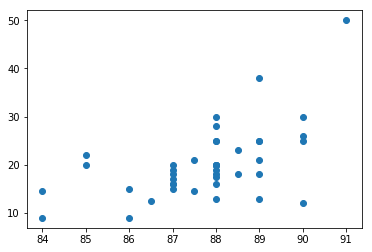

In [58]:
plt.scatter(avgs.points,avgs.price)

In [59]:
med_price = clean_data.groupby('country')[['price']].median()
avgs_point = clean_data.groupby('country')[['points']].mean()
counts = clean_data.groupby('country')[['price']].count()


med_price = med_price.reset_index()
avgs_point = avgs_point.reset_index()
counts = counts.reset_index()

#counts.head()

In [60]:
test_df = pd.merge(counts, avgs_point, on='country')
test_df = pd.merge(test_df, med_price, on='country')
test_df.columns = ['country', 'count', 'points', 'price']
test_df.head()

,country,count,points,price
0,Argentina,3756,86.710330,17.0
1,Armenia,2,87.500000,14.5
2,Australia,2294,88.595466,21.0
3,Austria,2799,90.190782,25.0
4,Bosnia and Herzegovina,2,86.500000,12.5


In [61]:
test_df.dtypes

country     object
count        int64
points     float64
price      float64
dtype: object

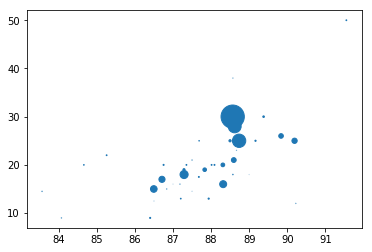

In [62]:

plt.scatter(test_df['points'], test_df['price'], s=test_df['count']*.01)
plt.show()

In [63]:
#test_df.head(50)

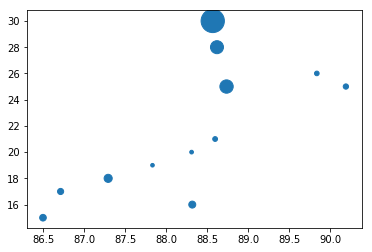

In [64]:
test2_df = test_df[test_df['count']>=500]
plt.scatter(test2_df['points'], test2_df['price'], s=test2_df['count']*.01)

plt.show()

In [65]:
#test2_df.head(50)

In [76]:
a = clean_data.groupby(['taster_name','country'])['points'].count()
a = a.reset_index()
a.head()

,taster_name,country,points
0,Alexander Peartree,US,413
1,Anna Lee C. Iijima,Bosnia and Herzegovina,1
2,Anna Lee C. Iijima,Bulgaria,19
3,Anna Lee C. Iijima,Canada,15
4,Anna Lee C. Iijima,Croatia,39


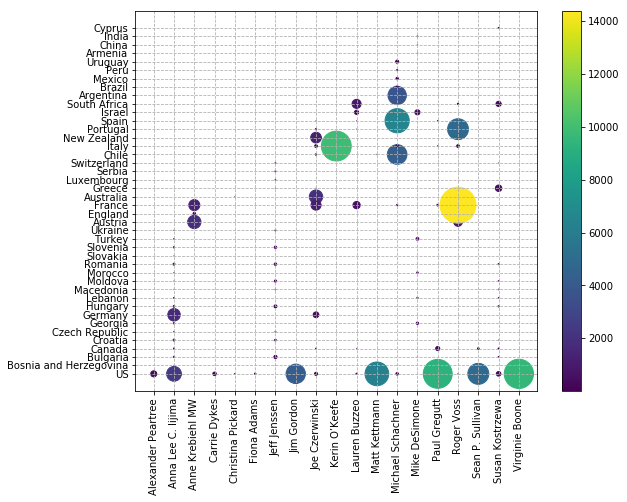

In [111]:
plt.figure(figsize=(9,7))
plt.scatter(a.taster_name,a.country,s=a.points*.09,c=a.points)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
plt.colorbar()
#plt.legend()
plt.show()

In [84]:
b = clean_data.groupby(['taster_name'])['country','points'].count()
b = b.reset_index()
b = b.sort_values(by='country')
b.head(20)
taster_list  = b[b['country']>=1000]['taster_name']

In [86]:
taster_list=list(taster_list)
taster_list

['Susan Kostrzewa',
 'Lauren Buzzeo',
 'Anne Krebiehl\xa0MW',
 'Jim Gordon',
 'Anna Lee C. Iijima',
 'Sean P. Sullivan',
 'Joe Czerwinski',
 'Matt Kettmann',
 'Paul Gregutt',
 'Virginie Boone',
 'Kerin O’Keefe',
 'Michael Schachner',
 'Roger Voss']

In [91]:
Wine_types={'Bold Red': ['Malbec', 'Syrah', 'Shiraz', 'Mourvedre', 'Pinotage', 'Petite Sirah', 'Touriga Nacional', 'Cabernet Sauvignon', 'Bordeaux Blend', 'Meritage'],
          'Medium Red': ['Meriot', 'Sangiovese', 'Zinfandel','Cabernet Franc', 'Tempranillo', 'Nebbiolo', 'Barbera', 'Cotes du Rhone Blend'],
          'Light Red':[ 'Pinot Noir', 'Grenache', 'Gamay', 'St. Laurent', 'Carignan', 'Counoise'],
          'Rich White': ['Chardonnay', 'Semillon','Viognier', 'Marsanne', 'Roussanne'],
          'Light White': ['Sauvignon Blanc', 'Albarino', 'Pitot Blanc', 'Vermentino', 'Melon de Bourgogne', 'Gargenega', 'Trebbiano', 'Pinot Gris', 'Pinot Grigio'],
          'Sweet White': ['Moscato', 'Riesling', 'Chenin Blanc', 'Gewurztraminer', 'Late Harvest Whites', 'Alascian Pinot Gris'],
          'Rose': ['Provencal Rose', 'White Zinfandel', 'Loire Valley Rose', 'Pinot Noir Rose', 'Syrah Rose', 'Garnache Rosado', 'Bandol Rose', 'Tempranilio Rose', 'Saignee Method Rose'],
          'Sparkling': ['Champagne', 'Prosecco', 'Cremant', 'Cava', 'Metodo Classico', 'Sparkling Wine', 'Sparkling Rose'],
          'Dessert': ['Port', 'Sherry', 'Maderia', 'Vin Santo', 'Muscat', 'PX', 'Pedro Ximenez']
          }
Wine_types.keys()

dict_keys(['Bold Red', 'Medium Red', 'Light Red', 'Rich White', 'Light White', 'Sweet White', 'Rose', 'Sparkling', 'Dessert'])

In [93]:
df_variety=pd.DataFrame()
for x in Wine_types.keys():
   wt=pd.DataFrame([])
   for y in range(len(Wine_types[x])):
       print('type=',x,'subtype=',Wine_types[x][y])
       wt=wt.append(clean_data[clean_data.variety.str.contains(Wine_types[x][y],na=False)])
       wt.head()
   wt.variety=x
   df_variety=df_variety.append(wt)

df_variety.groupby('variety')['price'].apply(lambda x: x.count())

type= Bold Red subtype= Malbec
type= Bold Red subtype= Syrah
type= Bold Red subtype= Shiraz
type= Bold Red subtype= Mourvedre
type= Bold Red subtype= Pinotage
type= Bold Red subtype= Petite Sirah
type= Bold Red subtype= Touriga Nacional
type= Bold Red subtype= Cabernet Sauvignon
type= Bold Red subtype= Bordeaux Blend
type= Bold Red subtype= Meritage
type= Medium Red subtype= Meriot
type= Medium Red subtype= Sangiovese
type= Medium Red subtype= Zinfandel
type= Medium Red subtype= Cabernet Franc
type= Medium Red subtype= Tempranillo
type= Medium Red subtype= Nebbiolo
type= Medium Red subtype= Barbera
type= Medium Red subtype= Cotes du Rhone Blend
type= Light Red subtype= Pinot Noir
type= Light Red subtype= Grenache
type= Light Red subtype= Gamay
type= Light Red subtype= St. Laurent
type= Light Red subtype= Carignan
type= Light Red subtype= Counoise
type= Rich White subtype= Chardonnay
type= Rich White subtype= Semillon
type= Rich White subtype= Viognier
type= Rich White subtype= Marsanne

variety
Bold Red       19719
Dessert         4068
Light Red      14877
Light White     7602
Medium Red     12582
Rich White     12791
Sparkling       1412
Sweet White     5930
Name: price, dtype: int64

In [94]:
df_variety.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
16,16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,NaN,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Bold Red,Felix Lavaque
17,17,Argentina,Raw black-cherry aromas are direct and simple ...,Winemaker Selection,87,13.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Gaucho Andino 2011 Winemaker Selection Malbec ...,Bold Red,Gaucho Andino
59,59,US,"Aromas of cranberry, barrel spice and herb are...",NaN,86,55.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Mellisoni 2014 Malbec (Columbia Valley (WA)),Bold Red,Mellisoni
160,160,France,Low-yield vines on the best parcels of the Vin...,NaN,91,35.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Château Vincens 2012 Malbec (Cahors),Bold Red,Château Vincens
224,224,Argentina,Blackberry and road-tar aromas are dark and st...,Lunta,90,22.0,Mendoza Province,Luján de Cuyo,NaN,Michael Schachner,@wineschach,Mendel 2014 Lunta Malbec (Luján de Cuyo),Bold Red,Mendel


In [116]:
aa = df_variety.groupby(['taster_name','variety'])['points'].count()
#aa = df_variety.groupby(['taster_name','variety','country'])['points'].count()

aa = aa.reset_index()
aa.head()

,taster_name,variety,points
0,Alexander Peartree,Bold Red,38
1,Alexander Peartree,Dessert,3
2,Alexander Peartree,Light Red,13
3,Alexander Peartree,Light White,17
4,Alexander Peartree,Medium Red,66


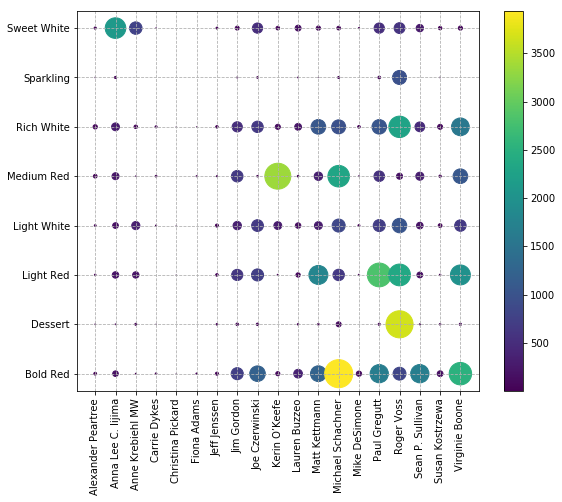

In [117]:
plt.figure(figsize=(9,7))
plt.scatter(aa.taster_name,aa.variety,s=aa.points*.2,c=aa.points)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
plt.colorbar()

plt.show()

In [118]:
bb = df_variety.groupby(['taster_name','country'])['points'].count()
#aa = df_variety.groupby(['taster_name','variety','country'])['points'].count()

bb = bb.reset_index()
bb.head()

,taster_name,country,points
0,Alexander Peartree,US,254
1,Anna Lee C. Iijima,Bulgaria,10
2,Anna Lee C. Iijima,Canada,11
3,Anna Lee C. Iijima,Croatia,3
4,Anna Lee C. Iijima,Czech Republic,1


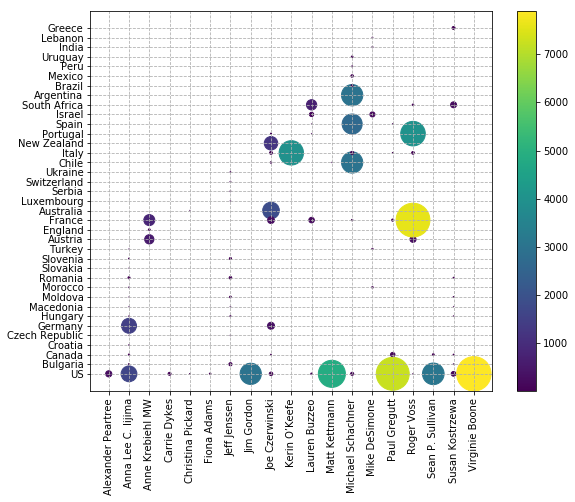

In [122]:
plt.figure(figsize=(9,7))
plt.scatter(bb.taster_name,bb.country,s=bb.points*.15,c=bb.points)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
plt.colorbar()

plt.show()